In [1]:



### Remove DC offset from signal


In [3]:

from __future__ import division      # so, 1/2 == 0.5 (forces real-valued division)
%pylab inline
#rcParams['figure.figsize'] = (10,4) #wide graphs by default
import numpy as np
import matplotlib
from matplotlib.colors import hsv_to_rgb

Populating the interactive namespace from numpy and matplotlib


In [4]:
from scipy.io import wavfile
from scipy.signal import freqs
 
 # pick one file name:
 
fName = ('media/assassin.wav')
 
fs, signal = wavfile.read(fName)
signal = signal / max(abs(signal))                        # scale signal
assert min(signal) >= -1 and max(signal) <= 1
print ('fs           ==> ', fs, 'Hz')                       # sampling rate
print ('len(signal)  ==> ', len(signal), 'samples')

fs           ==>  11025 Hz
len(signal)  ==>  288805 samples


C:\Users\X\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

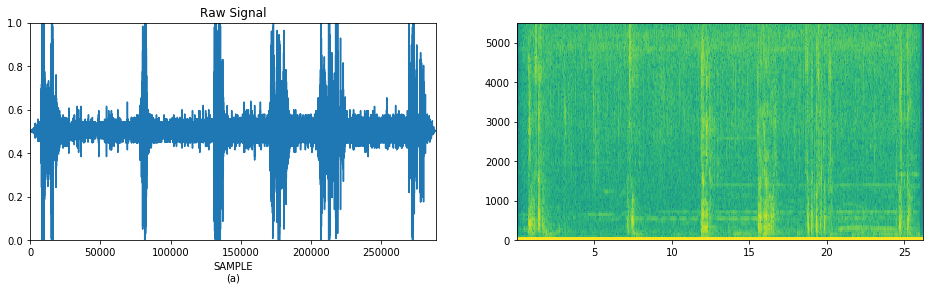

In [5]:
from numpy import linspace
 
_, (sp1, sp2) = plt.subplots(1, 2, figsize=(16, 4))
 
 # plot raw signal
sp1.plot(signal)
sp1.set_title('Raw Signal')
sp1.set_xlabel('SAMPLE\n(a)')
sp1.autoscale(tight='both')
 
 # plot spectrogram
spectrum, _, _, _ = sp2.specgram(signal, Fs=fs)
colorbar()
pass
sp2.set_title('Spectogram')
sp2.set_xlabel('TIME\n(b)')
nSecs = (len(signal) / fs)
ticksPerSec = 3
nTicks = nSecs * ticksPerSec + 1                # add 1 to include time=0
xTickMax = sp2.get_xticks()[-1]
sp2.set_xticks(linspace(0, xTickMax, nTicks))
sp2.set_xticklabels([round(x, 2) for x in linspace(0, nSecs, nTicks)])
sp2.set_ylabel('FREQ')
maxFreq = (fs / 2)
nTicks = maxFreq / 1000 + 1                     # add 1 to include freq=0
sp2.set_yticks(linspace(0, 1, nTicks))
sp2.set_yticklabels(linspace(0, maxFreq, nTicks));
sp2.autoscale(tight='both')
 

In [ ]:
from IPython import display
from scipy.signal import freqs
display.HTML("<audio controls><source src='{}'></audio>".format('media/assassin.wav'))

REMOVE DC OFFSET FROM SIGNAL

In [ ]:
DC = np.mean(signal)
newSignal = signal - DC                 # create a new signal, preserving old
print ('DC               ==> ', DC)
print ('mean(newSignal)  ==> ', np.mean(newSignal))
 

In [ ]:
from numpy import linspace
 
_, (sp1, sp2) = plt.subplots(1, 2, figsize=(16, 4))
 
 # plot raw signal
sp1.plot(newSignal)
sp1.set_title('Processed Signal')
sp1.set_xlabel('SAMPLE\n(a)')
sp1.autoscale(tight='both')
 
 # plot spectrogram
spectrum, _, _, _  = sp2.specgram(newSignal, Fs=fs)
colorbar()
pass
sp2.set_title('Spectogram')
sp2.set_xlabel('TIME\n(b)')
nSecs = len(newSignal) / fs
ticksPerSec = 3
nTicks = nSecs * ticksPerSec + 1                # add 1 to include time=0
xTickMax = sp2.get_xticks()[-1]
sp2.set_xticks(linspace(0, xTickMax, nTicks))
sp2.set_xticklabels([round(x, 2) for x in linspace(0, nSecs, nTicks)])
sp2.set_ylabel('FREQ')
maxFreq = (fs / 2)
nTicks = (maxFreq / 1000 + 1)                     # add 1 to include freq=0
sp2.set_yticks(linspace(0, 1, nTicks))
sp2.set_yticklabels(linspace(0, maxFreq, nTicks));
sp2.autoscale(tight='both')

Mains Hum removal

In [ ]:
from scipy.signal import iirnotch, freqz, lfilter

In [ ]:
b, a = iirnotch(60 / 44100, 10)

In [ ]:
frequency, response = freqz(b, a)
semilogy(frequency, abs(response))
title('Frequency Response')
grid()
xlim(0, 0.1)

In [ ]:
signal = sin(linspace(0, 60, 44100))
filteredsig = lfilter(b, a, signal)

In [ ]:
plot(signal)

In [ ]:
plot(filteredsig)